# Getting started

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

We start by importing the dataset, and having a look at the data.

In [5]:
# Load the character metadata using relative path

character_metadata = pd.read_csv("..\..\data\character.metadata.tsv", sep='\t')

column_names = ['Wikipedia_Movie_ID', 'Freebase_Movie_ID', 'Movie_Release_Date', 'Character_Name', 'Actor_DOB', 'Actor_Gender', 'Actor_Height', 'Actor_Ethnicity', 'Actor_Name', 'Actor_Age_At_Movie_Release', 'Freebase_Character_Actor_Map_ID', 'Freebase_character_ID', 'Freebase_Actor_ID']
character_metadata.columns = column_names

character_metadata.sample(5)

,Wikipedia_Movie_ID,Freebase_Movie_ID,Movie_Release_Date,Character_Name,Actor_DOB,Actor_Gender,Actor_Height,Actor_Ethnicity,Actor_Name,Actor_Age_At_Movie_Release,Freebase_Character_Actor_Map_ID,Freebase_character_ID,Freebase_Actor_ID
415880,358243,/m/01_41z,1983-07-06,Jonathan,1962-11-29,M,1.75,NaN,Andrew McCarthy,20.0,/m/02vd5s2,/m/0h33nwq,/m/01rcg5
281945,24003402,/m/04j2klf,1994,NaN,1956-06-15,F,1.73,NaN,Robin Curtis,37.0,/m/0cgcj3d,NaN,/m/02lddf
351405,12696164,/m/02x0vc9,1931-03-07,Orang-Utan's child,NaN,NaN,NaN,NaN,Rango,NaN,/m/0l0trz4,/m/0l0trz7,/m/0l0trzg
351148,6050371,/m/0fmkns,2005-11-11,Josh,1978-08-30,M,NaN,NaN,Gianpaolo Venuta,27.0,/m/0j8l6ww,/m/0j8l6wz,/m/0gh7vzp
358827,19925493,/m/04q0x7z,2007,NaN,1958-07-01,M,1.78,NaN,Tim Abell,48.0,/m/09j1qp2,NaN,/m/0307gs


For conveniance, we will add a new line called Movie_Release_Year that contains the year of release instead of the precise date. This will allow us to plot the distribution of movie year of release more nicely. We add the attribute "format = 'mixed'" because the movie release date is presented in different formats depending on the movie. Avoiding this attribute would lead to a considerable amount of NaN values in the release year, even for movies that actually have a non NaN release date.  

We repeat the same procedure for the actor date of birth.

In [6]:
character_metadata['Actor_DOB'] = pd.to_datetime(character_metadata['Actor_DOB'], format = 'mixed', errors='coerce')


character_metadata['Movie_Release_Date'] = pd.to_datetime(character_metadata['Movie_Release_Date'], format = 'mixed', errors='coerce', utc=True)
character_metadata['Movie_Release_Year'] = character_metadata['Movie_Release_Date'].dt.year


character_metadata['Actor_DOB'] = pd.to_datetime(character_metadata['Actor_DOB'], format = 'mixed', errors='coerce', utc=True)
character_metadata['Actor_YOB'] = character_metadata['Actor_DOB'].dt.year

character_metadata.sample(5)

C:\Users\llitz\AppData\Local\Temp\ipykernel_8396\1039685591.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  character_metadata['Actor_DOB'] = pd.to_datetime(character_metadata['Actor_DOB'], format = 'mixed', errors='coerce')


,Wikipedia_Movie_ID,Freebase_Movie_ID,Movie_Release_Date,Character_Name,Actor_DOB,Actor_Gender,Actor_Height,Actor_Ethnicity,Actor_Name,Actor_Age_At_Movie_Release,Freebase_Character_Actor_Map_ID,Freebase_character_ID,Freebase_Actor_ID,Movie_Release_Year,Actor_YOB
168918,35860423,/m/0jwv90d,NaT,NaN,1980-01-21 00:00:00+00:00,M,1.7,/m/0dryh9k,Santhanam,NaN,/m/0mznxmq,NaN,/m/0gp_x9,NaN,1980.0
190689,32806663,/m/0crtq8t,1937-01-01 00:00:00+00:00,NaN,1896-03-03 00:00:00+00:00,M,NaN,NaN,Willie Fung,NaN,/m/0gdlgfg,NaN,/m/03hjt67,1937.0,1896.0
264612,9034057,/m/027v97k,2011-04-15 00:00:00+00:00,Lillian Rearden,NaT,F,NaN,NaN,Rebecca Wisocky,NaN,/m/0ghd98n,/m/047k4ll,/m/09gd_jr,2011.0,NaN
166431,6554432,/m/0gb7pv,1948-01-01 00:00:00+00:00,NaN,1891-03-06 00:00:00+00:00,M,NaN,NaN,Victor Kilian,NaN,/m/02vc862,NaN,/m/06nypf,1948.0,1891.0
21391,221271,/m/01g97v,1998-09-13 00:00:00+00:00,Carmeta,1918-03-03 00:00:00+00:00,F,NaN,NaN,Conxita Bardem,80.0,/m/0j6zt1w,/m/0j6zt1z,/m/0j6zt25,1998.0,1918.0


Let's have a look at the distribution of some features !

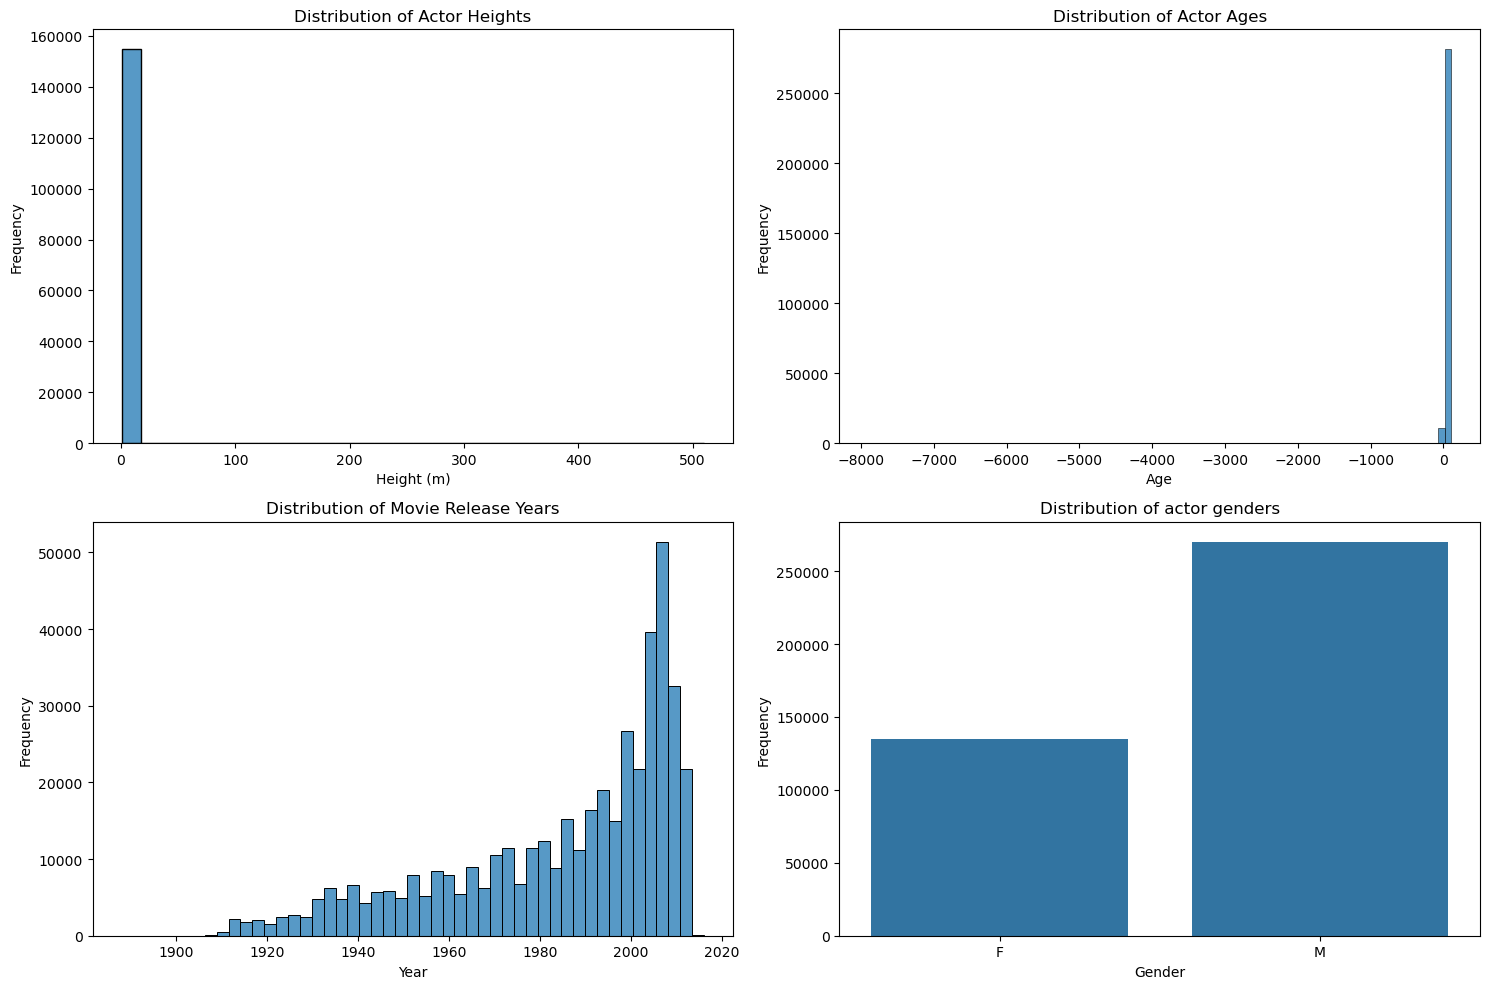

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(character_metadata['Actor_Height'], bins=30, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Actor Heights')
axs[0, 0].set_xlabel('Height (m)')
axs[0, 0].set_ylabel('Frequency')

sns.histplot(character_metadata['Actor_Age_At_Movie_Release'], bins=92, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Actor Ages')
axs[0, 1].set_xlabel('Age')
axs[0, 1].set_ylabel('Frequency')

sns.histplot(character_metadata['Movie_Release_Year'], bins=49, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Movie Release Years')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Frequency')

sns.countplot(data=character_metadata, x='Actor_Gender', ax=axs[1, 1])
axs[1, 1].set_title('Distribution of actor genders')
axs[1, 1].set_xlabel('Gender')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

We can observe that some values seem aberrant. We will have to clean the dataset to make sure to have reasonnable data.

# General preprocessing

We will first do a general preprocessing, and then we will focus on cleaning our data according to our subject of study. The general preprocessing will lead to a relatively small amount of data, but will be conveniant if we want to run a quick analysis on some specific features afterwards.

### Droping All NaNs and NaTs

Before dropping the missing values, we check their proportion for each feature of our dataset.

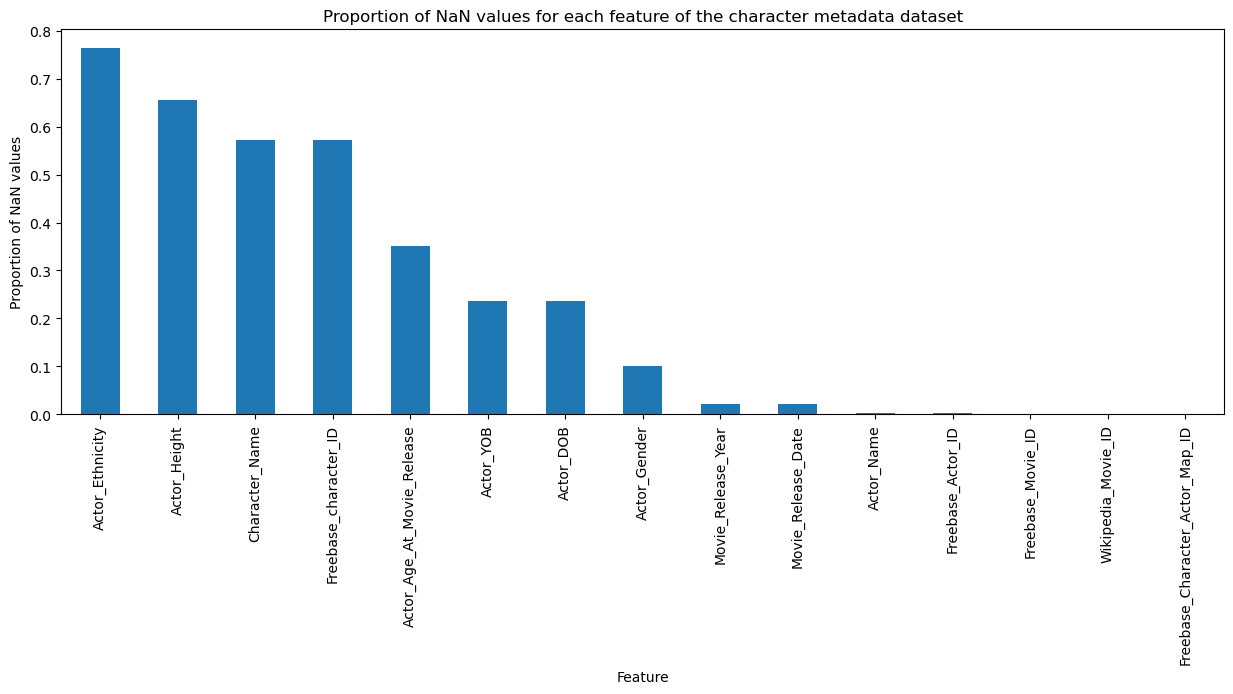

In [8]:
# plot the distibution of the proportion of nan values in each column of the character metadata dataframe. Sort them in descending order.

nan_proportions = character_metadata.isna().mean().sort_values(ascending=False)
nan_proportions.plot(kind='bar', figsize=(15, 5))
plt.title('Proportion of NaN values for each feature of the character metadata dataset')
plt.xlabel('Feature')
plt.ylabel('Proportion of NaN values')
plt.show()


We observe that some features contain a big amount of missing values, and we will need to be carefull about these features.

For now we do not focus on any feature, and we decide to drop every single empty values. As observed above, some columns have a majority of empty values, so dropping all the NaNs might not be a good idea when we want to do a targeted analysis. But for now we want a very general preprocessing, and we will later be more cautious.

In [9]:
copy1 = character_metadata.copy()
clean_data = copy1.dropna()

print("Length of original data: ", len(character_metadata), "Length of cleaned data: ", len(clean_data))

Length of original data:  450668 Length of cleaned data:  45264


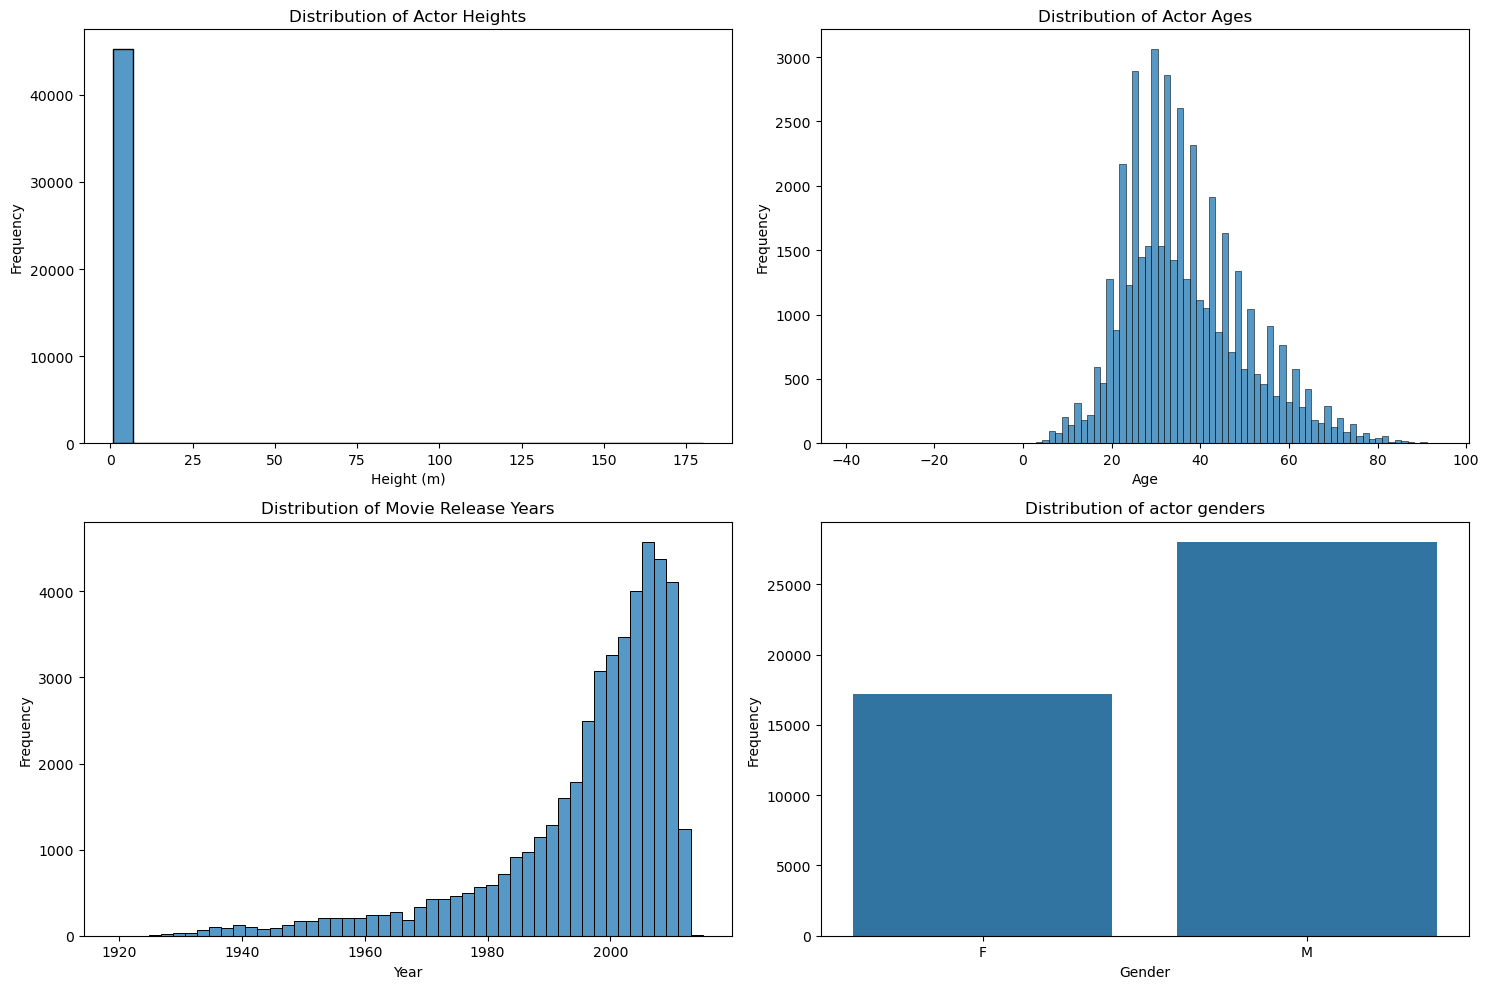

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(clean_data['Actor_Height'], bins=30, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Actor Heights')
axs[0, 0].set_xlabel('Height (m)')
axs[0, 0].set_ylabel('Frequency')

sns.histplot(clean_data['Actor_Age_At_Movie_Release'], bins=92, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Actor Ages')
axs[0, 1].set_xlabel('Age')
axs[0, 1].set_ylabel('Frequency')

sns.histplot(clean_data['Movie_Release_Year'], bins=49, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Movie Release Years')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Frequency')

sns.countplot(data=clean_data, x='Actor_Gender', ax=axs[1, 1])
axs[1, 1].set_title('Distribution of actor genders')
axs[1, 1].set_xlabel('Gender')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Although we removed empty values, we can still clearly observe aberrant values.

### Dropping aberrant values

We can see that even if there are no empty value, some values seem aberrant. We will get rid of these aberrant values.

In [11]:
clean_data = clean_data[clean_data['Actor_Height'] > 0]
clean_data = clean_data[clean_data['Actor_Height'] < 3]
clean_data = clean_data[clean_data['Actor_Age_At_Movie_Release'] > 0]
clean_data = clean_data[clean_data['Actor_Age_At_Movie_Release'] < 110]
clean_data = clean_data[clean_data['Movie_Release_Year'] > 1850]
clean_data = clean_data[clean_data['Movie_Release_Year'] < 2020]
clean_data = clean_data[clean_data['Actor_YOB'] > 1840]
clean_data = clean_data[clean_data['Actor_YOB'] < 2020]


print("Length of cleaned data after removing aberrant values: ", len(clean_data))

Length of cleaned data after removing aberrant values:  45236


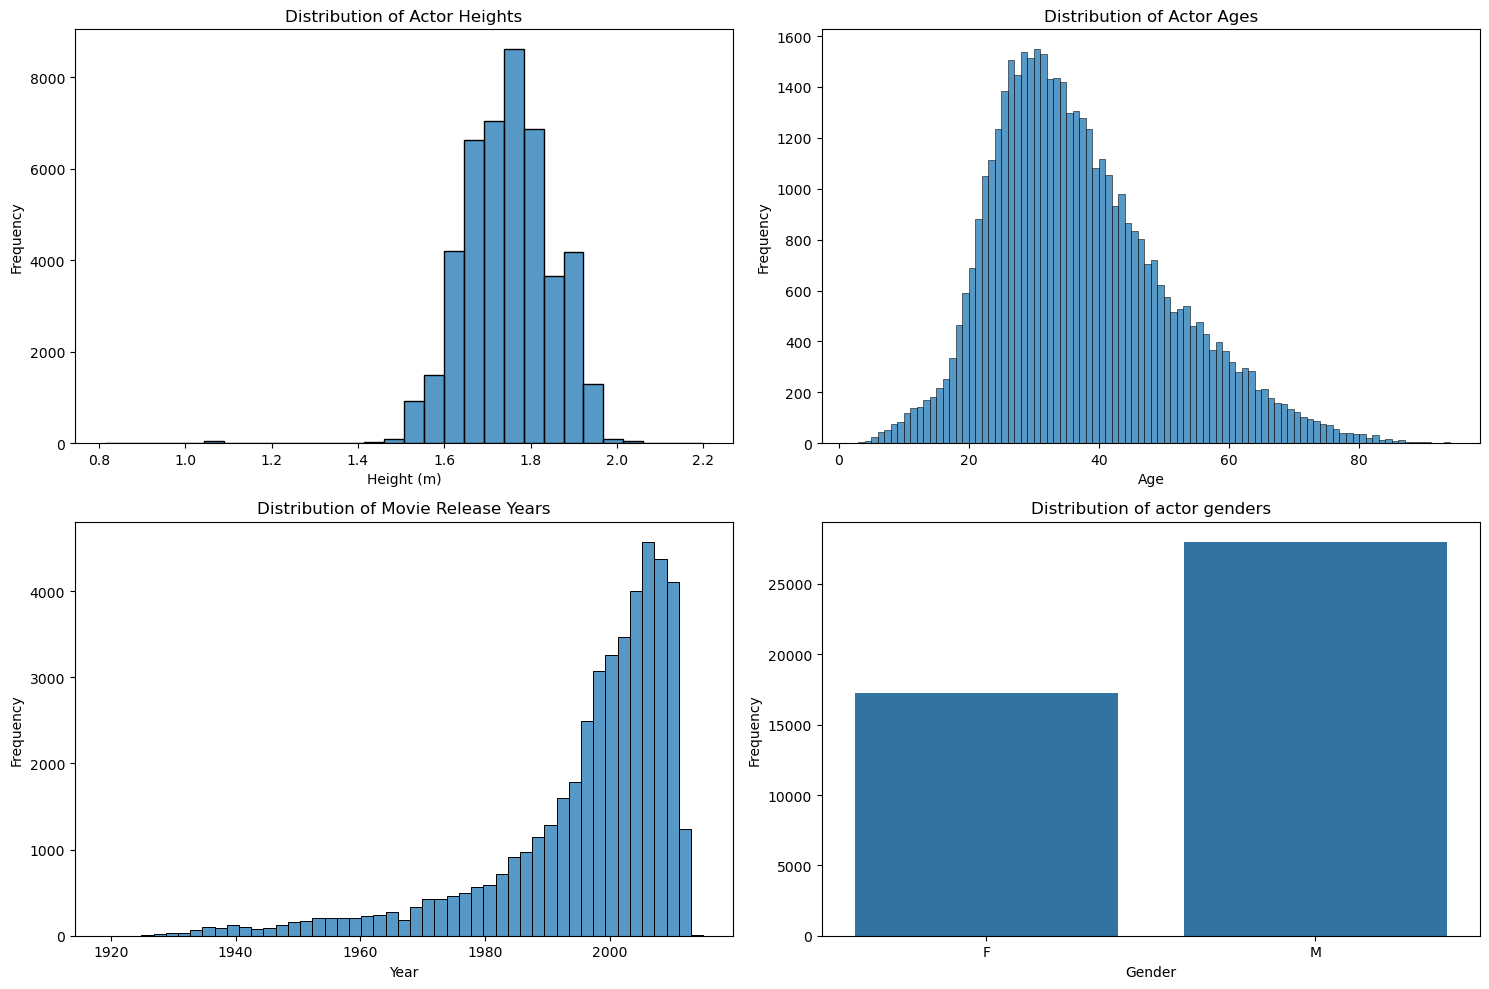

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(clean_data['Actor_Height'], bins=30, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Actor Heights')
axs[0, 0].set_xlabel('Height (m)')
axs[0, 0].set_ylabel('Frequency')

sns.histplot(clean_data['Actor_Age_At_Movie_Release'], bins=92, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Actor Ages')
axs[0, 1].set_xlabel('Age')
axs[0, 1].set_ylabel('Frequency')

sns.histplot(clean_data['Movie_Release_Year'], bins=49, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Movie Release Years')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Frequency')

sns.countplot(data=clean_data, x='Actor_Gender', ax=axs[1, 1])
axs[1, 1].set_title('Distribution of actor genders')
axs[1, 1].set_xlabel('Gender')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Now the data seem reasonable ! However, dropping all the empty values led to a significant decrease in the amount of data, and we probably dropped some useful information for our analysis.

We will now start again the exact same preprocessing from the original dataset, but we will focus on our subject, and drop only the empty values of the categories we are interested in. 

# Taking into acount our subject

We are studying the impact of 9/11 on the movie industry. In this dataset, we are particularly interested in the release year and the actor ethnicity. We will get rid of all the useless columns.

First of all, we are interested in the column "ethnicity", so we need to create a function that maps from FreebaseID to the corresponding label. To do so, we use the freebase-wikidata-mapping dataset found here : https://www.kaggle.com/datasets/latebloomer/freebase-wikidata-mapping/data. 

In [13]:
def freebase2label(freebase_id, mapping_dataframe):
    label = mapping_dataframe[mapping_dataframe['freebase_id'] == freebase_id]['label']
    if len(label) > 0:
        return label.values[0]
    else:
        return None
    
file_path = r"..\..\data\freebase_mapping.tsv"
freebase_mapping_df = pd.read_csv(file_path, sep='\t')

Before applying our function, we first need to clean the dataset. Let's first remove the columns we're not interested in.

In [14]:
dataset = character_metadata.copy()
dataset = dataset.drop(columns=['Movie_Release_Date', 'Actor_DOB', 'Actor_Gender', 'Actor_Height', 'Actor_YOB'])

In [15]:
dataset.sample(5)

,Wikipedia_Movie_ID,Freebase_Movie_ID,Character_Name,Actor_Ethnicity,Actor_Name,Actor_Age_At_Movie_Release,Freebase_Character_Actor_Map_ID,Freebase_character_ID,Freebase_Actor_ID,Movie_Release_Year
255110,31212699,/m/09rmlmd,Dominic,NaN,Gilbert Emery,NaN,/m/0hpylqx,/m/0hpylpm,/m/04bxpq,1934.0
357035,33108995,/m/09rr31x,NaN,NaN,S.Z. Sakall,NaN,/m/0h6hxyv,NaN,/m/09k292,1949.0
57872,11670299,/m/02rndrh,Lynn Markham,NaN,Joan Crawford,49.0,/m/03kz_tw,/m/0gy2qkb,/m/0cgbf,1955.0
347112,10440670,/m/02qd6h2,Carla Davenport,/m/02w7gg,Kate Beckinsale,34.0,/m/02tb6m2,/m/0gxbc31,/m/01pk8v,2008.0
64653,10028410,/m/02p_921,NaN,NaN,Ian Roberts,38.0,/m/0cg0s17,NaN,/m/06r41s,2004.0


Depending on what feature we want to study, we drop the missing values in the corresponding columns.

In [ ]:
release_year_dataset = dataset.copy()
release_year_dataset = release_year_dataset.dropna(subset=['Movie_Release_Year'])

ethnicity_dataset = dataset.copy()
ethnicity_dataset = ethnicity_dataset.dropna(subset=['Actor_Ethnicity'])

no_nan_dataset = dataset.copy()
no_nan_dataset = no_nan_dataset.dropna(subset=['Movie_Release_Year', 'Actor_Ethnicity'])

print("Length of original dataset: ", len(dataset))

print("Length of dataset with no NaN values in Movie_Release_Year: ", len(release_year_dataset))
print("Length of dataset with no NaN values in Actor_Ethnicity: ", len(ethnicity_dataset))
print("Length of dataset with no NaN values in both Movie_Release_Year and Actor_Ethnicity: ", len(no_nan_dataset))

Length of original dataset:  450668
Length of dataset with no NaN values in Movie_Release_Year:  440658
Length of dataset with no NaN values in Actor_Ethnicity:  106058
Length of dataset with no NaN values at all:  102842


In [17]:
release_year_dataset = release_year_dataset[release_year_dataset['Actor_Age_At_Movie_Release'] > 0]
release_year_dataset = release_year_dataset[release_year_dataset['Actor_Age_At_Movie_Release'] < 110]
release_year_dataset = release_year_dataset[release_year_dataset['Movie_Release_Year'] > 1850]
release_year_dataset = release_year_dataset[release_year_dataset['Movie_Release_Year'] < 2020]

print("Length of release year dataset after removing aberrant values: ", len(release_year_dataset))

ethnicity_dataset = ethnicity_dataset[ethnicity_dataset['Actor_Age_At_Movie_Release'] > 0]
ethnicity_dataset = ethnicity_dataset[ethnicity_dataset['Actor_Age_At_Movie_Release'] < 110]
ethnicity_dataset = ethnicity_dataset[ethnicity_dataset['Movie_Release_Year'] > 1850]
ethnicity_dataset = ethnicity_dataset[ethnicity_dataset['Movie_Release_Year'] < 2020]

print("Length of ethnicity dataset after removing aberrant values: ", len(ethnicity_dataset))

no_nan_dataset = no_nan_dataset[no_nan_dataset['Actor_Age_At_Movie_Release'] > 0]
no_nan_dataset = no_nan_dataset[no_nan_dataset['Actor_Age_At_Movie_Release'] < 110]
no_nan_dataset = no_nan_dataset[no_nan_dataset['Movie_Release_Year'] > 1850]
no_nan_dataset = no_nan_dataset[no_nan_dataset['Movie_Release_Year'] < 2020]

print("Length of no nan dataset after removing aberrant values: ", len(no_nan_dataset))


Length of release year dataset after removing aberrant values:  292122
Length of ethnicity dataset after removing aberrant values:  93246
Length of no nan dataset after removing aberrant values:  93246


We can now check that the data seems reasonnably distributed and that it does not contain aberrant values.

<Figure size 1500x500 with 0 Axes>

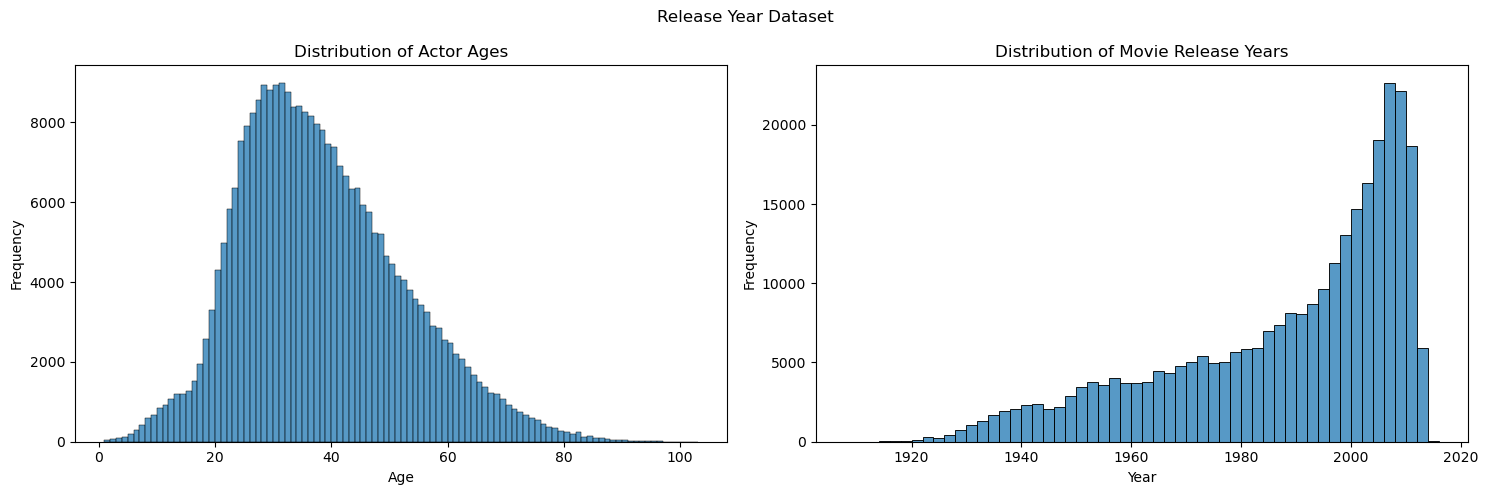

In [ ]:
plt.figure(figsize=(15, 5))
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(release_year_dataset['Actor_Age_At_Movie_Release'], bins=102, ax=axs[0])
axs[0].set_title('Distribution of Actor Ages')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Frequency')

sns.histplot(release_year_dataset['Movie_Release_Year'], bins=54, ax=axs[1])
axs[1].set_title('Distribution of Movie Release Years')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Frequency')

plt.suptitle('Release Year Dataset')
plt.tight_layout()
plt.show()

<Figure size 1500x500 with 0 Axes>

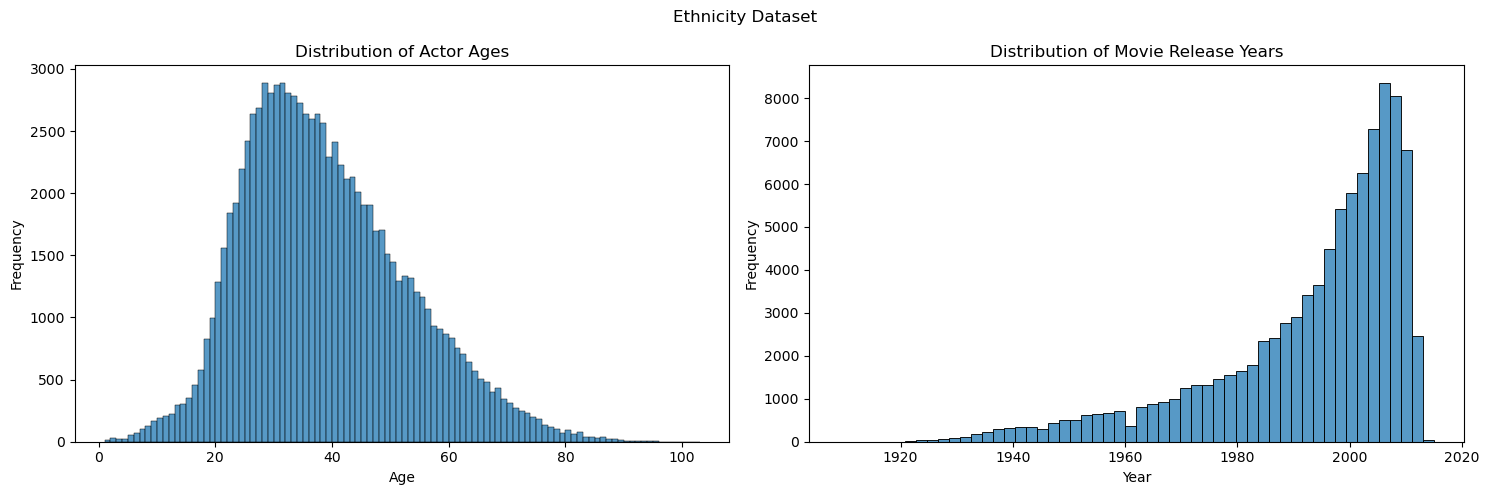

In [24]:
plt.figure(figsize=(15, 5))
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(ethnicity_dataset['Actor_Age_At_Movie_Release'], bins=102, ax=axs[0])
axs[0].set_title('Distribution of Actor Ages')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Frequency')

sns.histplot(ethnicity_dataset['Movie_Release_Year'], bins=54, ax=axs[1])
axs[1].set_title('Distribution of Movie Release Years')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Frequency')

plt.suptitle('Ethnicity Dataset')
plt.tight_layout()
plt.show()

Now that we have cleaned our data, we want to change the freebase IDs in the ethnicity column to labels that are understandable. To achieve this, we use the function previously introduced. 

In [ ]:
from tqdm import tqdm

for i in tqdm(range(len(no_nan_dataset))):
    no_nan_dataset.loc[i, 'Ethnicity_Label'] = freebase2label(no_nan_dataset['Actor_Ethnicity'].iloc[i], freebase_mapping_df)

# Drop rows that could not be mapped
no_nan_dataset = no_nan_dataset.dropna(subset='Ethnicity_Label')

In [ ]:
# save as tsv at the location "..\..\data\preprocessed_character_metadata.tsv"

no_nan_dataset.to_csv(r"..\..\data\preprocessed_character_metadata.tsv", sep='\t', index=False)

That's about it ! The preprocessing is ready for our analysis on the character dataset !